### **We will start by importing necessary libraries and loading the Titanic dataset.**

In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importing sklearn libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

In [2]:
# Load Titanic dataset
titanic = fetch_openml(name='titanic', version=1)

# Convert to DataFrame
df_titanic = pd.DataFrame(titanic.data, columns=titanic.feature_names)
df_titanic['target'] = titanic.target

# Display first few rows
df_titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,target
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,None,"St Louis, MO",1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",0


### **Data Exploration and Preprocessing**

In [3]:
# Checking for missing values
df_titanic.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
target          0
dtype: int64

In [6]:
# Handle missing values
df_titanic['age'].fillna(df_titanic['age'].median(), inplace=True)
df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0], inplace=True)

In [10]:
# Drop unnecessary columns
df_titanic = df_titanic.drop(['name','ticket', 'cabin','boat','body', 'home.dest'], axis=1)

In [11]:
# Convert categorical variables into numeric
df_titanic = pd.get_dummies(df_titanic, columns=['sex', 'embarked'], drop_first=True)

In [13]:
# Define features and target variable
X = df_titanic.drop('target', axis=1)
y = df_titanic['target']

### **Implementing a Decision Tree classifier and evaluating its performance.**

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       144
           1       0.78      0.68      0.73       118

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262

Confusion Matrix:


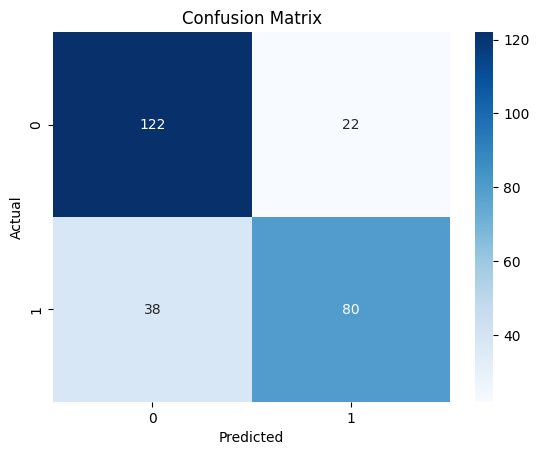

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### **Implementing a Random Forest classifier and comparing with Decision Tree.**

In [19]:
# Creating Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluating model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Classification report for Random Forest
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       144
           1       0.82      0.69      0.75       118

    accuracy                           0.79       262
   macro avg       0.80      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



### **Implementing hyperparameter tuning using RandomizedSearchCV for Random Forest.**

In [20]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=1

### **Implementing Cross Validation to validate model performance.**

In [22]:
# Cross Validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Mean Cross Validation Score:", cv_scores.mean())


Cross Validation Scores: [nan nan nan nan nan]
Mean Cross Validation Score: nan


### **Implementing a Gradient Boosting classifier and evaluating its performance.**

In [23]:
# Creating Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predicting on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

# Classification report
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       144
           1       0.86      0.60      0.71       118

    accuracy                           0.77       262
   macro avg       0.80      0.76      0.76       262
weighted avg       0.79      0.77      0.77       262



### **Implementing XGBoost classifier and comparing with Gradient Boosting.**

In [26]:
# Import the necessary library
from xgboost import XGBClassifier

In [29]:
# Convert y_test to numeric type to match y_pred_xgb
y_test = y_test.astype(int)

# Creating XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predicting on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluating model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

# Classification report for XGBoost
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       144
           1       0.83      0.71      0.77       118

    accuracy                           0.81       262
   macro avg       0.81      0.80      0.80       262
weighted avg       0.81      0.81      0.80       262



### **Implementing CatBoost classifier and comparing with other models.**

In [32]:
# Import the necessary library
from catboost import CatBoostClassifier

In [33]:
# Creating CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_model.fit(X_train, y_train)

# Predicting on test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluating model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost:.2f}")

# Classification report for CatBoost
print(classification_report(y_test, y_pred_catboost))

CatBoost Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.74      0.91      0.82       144
           1       0.85      0.61      0.71       118

    accuracy                           0.77       262
   macro avg       0.79      0.76      0.76       262
weighted avg       0.79      0.77      0.77       262



### **Implementing AdaBoost classifier and evaluating its performance.**

In [35]:
# Creating AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Predicting on test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluating model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")

# Classification report for AdaBoost
print(classification_report(y_test, y_pred_adaboost))

AdaBoost Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       144
           1       0.84      0.68      0.75       118

    accuracy                           0.80       262
   macro avg       0.81      0.79      0.79       262
weighted avg       0.80      0.80      0.79       262



### **Implementing LightGBM classifier and evaluating its performance.**

In [38]:
# Import the necessary library
from lightgbm import LGBMClassifier

In [39]:
# Creating LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Predicting on test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluating model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}")

# Classification report for LightGBM
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 382, number of negative: 665
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 308
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364852 -> initscore=-0.554366
[LightGBM] [Info] Start training from score -0.554366
LightGBM Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       144
           1       0.85      0.70      0.77       118

    accuracy                           0.81       262
   macro avg       0.82      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



### **KNN Implementation**

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       144
           1       0.71      0.46      0.56       118

    accuracy                           0.67       262
   macro avg       0.68      0.65      0.65       262
weighted avg       0.68      0.67      0.66       262

